<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Проверка-эффективности-обогащения-на-правильность-расчета" data-toc-modified-id="Проверка-эффективности-обогащения-на-правильность-расчета-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка эффективности обогащения на правильность расчета</a></span></li><li><span><a href="#Анализ-признаков,-недоступных-в-тестовой-выборке" data-toc-modified-id="Анализ-признаков,-недоступных-в-тестовой-выборке-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Анализ признаков, недоступных в тестовой выборке</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Как-меняется-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки" data-toc-modified-id="Как-меняется-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки</a></span></li><li><span><a href="#Сравние-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках" data-toc-modified-id="Сравние-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравние распределения размеров гранул сырья на обучающей и тестовой выборках</a></span></li><li><span><a href="#Исследование-суммарной-концентрации-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах." data-toc-modified-id="Исследование-суммарной-концентрации-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследование суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.</a></span></li></ul></li><li><span><a href="#Построение-модель" data-toc-modified-id="Построение-модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Построение модель</a></span><ul class="toc-item"><li><span><a href="#Функция-для-вычисления-итоговой-sMAPE" data-toc-modified-id="Функция-для-вычисления-итоговой-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция для вычисления итоговой sMAPE</a></span></li><li><span><a href="#Подготовка-модели" data-toc-modified-id="Подготовка-модели-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Подготовка модели</a></span></li></ul></li><li><span><a href="#Общий-вывод-исследования" data-toc-modified-id="Общий-вывод-исследования-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод исследования</a></span></li></ul></div>

# Восстановление золота из руды

Необходим прототип модели машинного обучения для компании которая разрабатывает решения эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В использовании для исследования будут данные с параметрами добычи и очистки.

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

**Описание данных** 

- Rougher feed — исходное сырье
- Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
- Xanthate **— ксантогенат (промотер, или активатор флотации);
- Sulphate — сульфат (на данном производстве сульфид натрия);
- Depressant — депрессант (силикат натрия).
- Rougher process (англ. «грубый процесс») — флотация
- Rougher tails — отвальные хвосты
- Float banks — флотационная установка
- Cleaner process — очистка
- Rougher Au — черновой концентрат золота
- Final Au — финальный концентрат золота


- air amount — объём воздуха
- fluid levels — уровень жидкости
- feed size — размер гранул сырья
- feed rate — скорость подачи

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(13,10)})
import re

from scipy import stats as st

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score,GridSearchCV

from sklearn.dummy import DummyRegressor

import warnings
warnings.filterwarnings('ignore')

## Подготовка данных

### Изучение данных

In [2]:
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv',index_col='date',parse_dates=True)
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv',index_col='date',parse_dates=True)
df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv',index_col='date',parse_dates=True)

In [3]:
display(df_train.info())
display(df_test.info())
display(df_full.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                     

None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5286 non-null   float64
 1   primary_cleaner.input.depressant            5285 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5286 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 

None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               19433 non-null  float64
 8   final.output.tail_au                     

None

In [4]:
display(df_train.head(5))
display(df_test.head(5))
display(df_full.head(5))

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [5]:
display(df_train.describe())
display(df_test.describe())
display(df_full.describe())

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


In [6]:
display(df_train.isnull().sum())
display(df_test.isnull().sum())
display(df_full.isnull().sum())

final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
final.output.recovery                           0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 86, dtype: int64

primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatbank10_xanthate             0
rougher.input.floatb

final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
final.output.recovery                           0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 86, dtype: int64

In [7]:
df_train.isnull().sum().sort_values(ascending = False) / df_train.shape[0] * 100

secondary_cleaner.output.tail_sol           11.343558
rougher.state.floatbank10_e_air              3.081490
rougher.input.floatbank11_xanthate           3.024949
primary_cleaner.output.concentrate_sol       2.021344
secondary_cleaner.state.floatbank2_a_air     1.533677
                                              ...    
rougher.state.floatbank10_d_air              0.000000
rougher.output.concentrate_au                0.000000
rougher.output.recovery                      0.000000
rougher.output.tail_pb                       0.000000
rougher.output.concentrate_ag                0.000000
Length: 86, dtype: float64

In [8]:
df_test.isnull().sum().sort_values(ascending = False) / df_test.shape[0] * 100

rougher.input.floatbank11_xanthate            0.472590
rougher.input.feed_sol                        0.396975
secondary_cleaner.state.floatbank3_a_air      0.170132
rougher.input.floatbank11_sulfate             0.151229
primary_cleaner.input.depressant              0.094518
rougher.input.floatbank10_sulfate             0.094518
primary_cleaner.input.sulfate                 0.075614
primary_cleaner.input.xanthate                0.075614
rougher.input.feed_rate                       0.056711
secondary_cleaner.state.floatbank2_a_air      0.056711
secondary_cleaner.state.floatbank2_b_air      0.037807
rougher.input.feed_size                       0.018904
secondary_cleaner.state.floatbank3_b_level    0.000000
secondary_cleaner.state.floatbank3_b_air      0.000000
rougher.state.floatbank10_f_air               0.000000
rougher.state.floatbank10_f_level             0.000000
secondary_cleaner.state.floatbank6_a_air      0.000000
secondary_cleaner.state.floatbank5_b_level    0.000000
secondary_

In [9]:
df_full.isnull().sum().sort_values(ascending = False) / df_full.shape[0] * 100

secondary_cleaner.output.tail_sol           8.992232
rougher.input.floatbank11_xanthate          2.330367
rougher.state.floatbank10_e_air             2.242914
primary_cleaner.output.concentrate_sol      1.903390
secondary_cleaner.state.floatbank2_a_air    1.131745
                                              ...   
rougher.state.floatbank10_d_level           0.000000
rougher.state.floatbank10_d_air             0.000000
rougher.output.tail_sol                     0.000000
rougher.output.tail_au                      0.000000
rougher.output.concentrate_ag               0.000000
Length: 86, dtype: float64

In [10]:
display(df_train.duplicated().sum())
display(df_test.duplicated().sum())
display(df_full.duplicated().sum())

0

0

0

**В данных имеются пропуски:**

 - df_train: 22%
 - df_test:  ~1%
 - df_full:  17%

Дубликатов в данных не найдено

### Проверка эффективности обогащения на правильность расчета

Эффективность обогащения рассчитывается по формуле:

R = 100 * (C*(F-T)) / (F*(C-T)

где, 

- C — доля золота в концентрате после флотации/очистки
- F — доля золота в сырье/концентрате до флотации/очистки
- T — доля золота в отвальных хвостах после флотации/очистки

In [11]:
#Напишем функциб с помощью которой расчитаем эффективность
F = df_train['rougher.input.feed_au']
C = df_train['rougher.output.concentrate_au']
T = df_train['rougher.output.tail_au']

In [12]:
recovery = C*(F-T)/(F*(C-T))*100
print(recovery)

date
2016-01-15 00:00:00    87.107763
2016-01-15 01:00:00    86.843261
2016-01-15 02:00:00    86.842308
2016-01-15 03:00:00    87.226430
2016-01-15 04:00:00    86.688794
                         ...    
2018-08-18 06:59:59    89.574376
2018-08-18 07:59:59    87.724007
2018-08-18 08:59:59    88.890579
2018-08-18 09:59:59    89.858126
2018-08-18 10:59:59    89.514960
Length: 14149, dtype: float64


In [13]:
error = mean_absolute_error(df_train['rougher.output.recovery'], recovery)
print('MAE:', error)

MAE: 9.73512347450521e-15


Ошибка очень низкая, значит эффективность обогощения была расчитана верно

### Анализ признаков, недоступных в тестовой выборке

Рассмотрим какие столбцы (призаки) отличаются в тестовой и обучающей выборке

In [14]:
#сравним два сета данных между собой. Метод вернет нам столбцы, которых нет в тестовой выборке.
missed_test_columns = set(list(df_train.columns.values))-set(list(df_test.columns.values))
missed_test_columns

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

In [15]:
#Определлим какие признаки в двух сетах одинаковые
[i for i in list(df_train.columns) if (i in list(df_test.columns))]

['primary_cleaner.input.sulfate',
 'primary_cleaner.input.depressant',
 'primary_cleaner.input.feed_size',
 'primary_cleaner.input.xanthate',
 'primary_cleaner.state.floatbank8_a_air',
 'primary_cleaner.state.floatbank8_a_level',
 'primary_cleaner.state.floatbank8_b_air',
 'primary_cleaner.state.floatbank8_b_level',
 'primary_cleaner.state.floatbank8_c_air',
 'primary_cleaner.state.floatbank8_c_level',
 'primary_cleaner.state.floatbank8_d_air',
 'primary_cleaner.state.floatbank8_d_level',
 'rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_rate',
 'rougher.input.feed_size',
 'rougher.input.feed_sol',
 'rougher.input.feed_au',
 'rougher.input.floatbank10_sulfate',
 'rougher.input.floatbank10_xanthate',
 'rougher.input.floatbank11_sulfate',
 'rougher.input.floatbank11_xanthate',
 'rougher.state.floatbank10_a_air',
 'rougher.state.floatbank10_a_level',
 'rougher.state.floatbank10_b_air',
 'rougher.state.floatbank10_b_level',
 'rougher.state.floatbank10_c_air',
 'rough

**Опишем сходства и различия в сетах данных df_train и df_test:**

Общие признаки:
 - date
 - primary_cleaner.input  - первичная очистка c параметрами сырья
 - primary_cleaner.state - первичная очистка c параметрами, характеризующими текущее состояние этапа
 - rougher.input - флотация с параметрами сырья
 - rougher.state - флотация c параметрами, характеризующими текущее состояние этапа
 - secondary_cleaner.state - вторичная очистка c параметрами, характеризующими текущее состояние этапа
 
Признаки которых нет в тестовой выборке:

 - final.output - финальные характеристики с параметрами продукта
 - primary_cleaner.output - первичная очистка с параметрами продукта
 - rougher.calculated -  флотация с расчетными характеристиками
 - rougher.output - флотация с параметрами продукта
 - secondary_cleaner.output - вторичная очистка с параметрами продукта
 
 
 так же в тестовой выборке отсутствуют целевые признаки дла каждого этапа 'rougher.output.recovery', 'rougher.calculated.recovery', 'rougher.output.recovery' 
 
  **Эти данные недоступны в начале протекания технологического процесса и становятся известны на более поздней стадии**

### Предобработка данных

Ранее мы определили, колличество пропусков в данных:

 - df_train: 22%
 - df_test:  ~1%
 - df_full:  17%
 
т.к восстановить эти пропуски у нас нет возможности и заменить их медианными или среднеми значениями тоже, то мы их просто восстановим основываясь на значениях ближайших строк. т.к данные в таблице расположены по времени, и значения соседних объектов мало отличаются друг от друга

In [16]:
df_train = df_train.fillna(method='ffill')
df_test = df_test.fillna(method='ffill')
df_full = df_full.fillna(method='ffill')

In [17]:
#Проверим размер данных
display(df_train.shape[0])
display(df_test.shape[0])
display(df_full.shape[0])

14149

5290

19439

In [18]:
#Добавляем в test целевые признаки
df_test = df_test.merge(df_full[['rougher.output.recovery', 'final.output.recovery']], on = 'date', how = 'left')

In [19]:
features_rough_concentrate = [
    'rougher.output.concentrate_au',
    'rougher.output.concentrate_ag',
    'rougher.output.concentrate_pb',
    'rougher.output.concentrate_sol']

features_input_concentrate = [
    'rougher.input.feed_au',
    'rougher.input.feed_ag',
    'rougher.input.feed_pb',
    'rougher.input.feed_sol']

features_final_concentrate = [
    'final.output.concentrate_au',
    'final.output.concentrate_ag',
    'final.output.concentrate_pb',
    'final.output.concentrate_sol']

display(df_test.shape)
display(df_train.shape)

(5290, 54)

(14149, 86)

Дубликатов в данных нет, поэтому можно переходить к анализу

**Промежуточный вывод:**

- Данные успешно загружены и проанализированы. Данные соответствуют описанию, дубликатов нет.
- Показатель эффективности обогащения рассчитан корректно.
- Для актуальных признаков были заполнены пропуски на основе имеющихся исторических данных.
- В тестовую выборку добавлены целевые признаки

In [20]:
print('В обучающей выборке : {} строк и {} признаков'.format(df_train.shape[0],df_train.shape[1]))
print('В тестовой выборке: {} строк и {} признаков'.format(df_test.shape[0], df_test.shape[1]))

В обучающей выборке : 14149 строк и 86 признаков
В тестовой выборке: 5290 строк и 54 признаков


## Анализ данных

### Как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки

Определим какие стадии есть:

- 'rougher.input.feed'
- 'rougher.output.concentrate'
- 'primary_cleaner.output.concentrate'
- 'final.output.concentrate'

In [21]:
stage_list = ['rougher.input.feed', 'rougher.output.concentrate', 'primary_cleaner.output.concentrate', 'final.output.concentrate']

metal_list = ['au', 'pb', 'ag']

In [22]:
def display_hist(data, metal):
    data.plot.hist(bins=100, alpha=0.65, figsize= (12,7))
    plt.title(f'Концентрация {metal} на всех стадиях')
    plt.legend(['Сырье', 'Черновой концентрат', 'Первичная очистка', 'Финальный концентрат'])
    plt.xlabel(f'Распределение концентрации {metal}')
    plt.ylabel('Объем')
    plt.show()

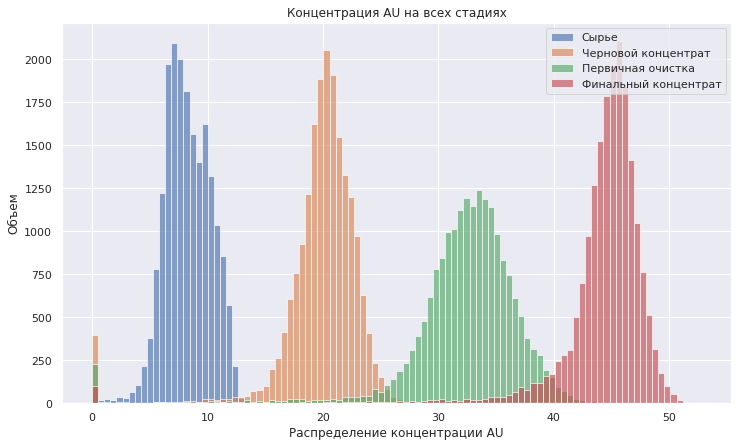

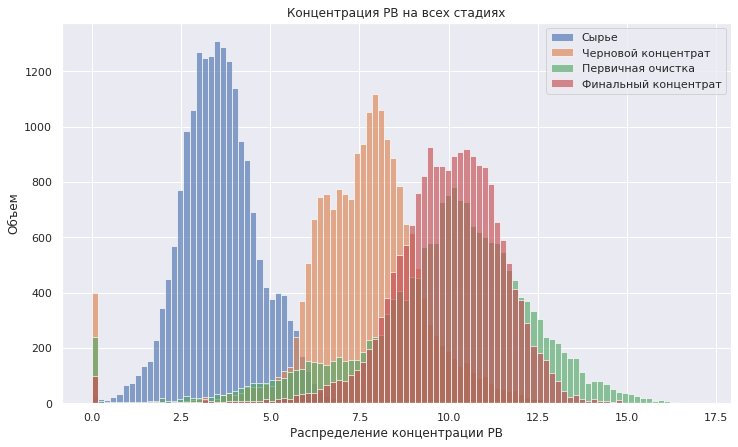

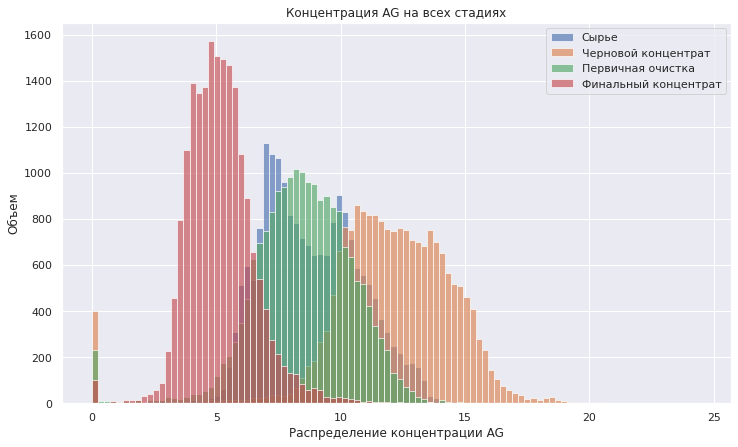

In [23]:
for metal in metal_list:
    columns = []
    for stage in stage_list:
        columns.append(stage+'_'+metal)
        
    display_hist(df_full[columns], metal.upper())

**ВЫВОД:**

- концентрация для золота с каждым этапом очистки увеличивается, концентрация серебра уменьшается.
- На графиках прослеживается увеличение концентрации золота в смеси с каждым новым этапом очистки. Также увеличивается концентрация золота относительно других металлов.

### Сравние распределения размеров гранул сырья на обучающей и тестовой выборках


Размер гранул находится в столбце rougher.input.feed_size для этапа флотации и primary_cleaner.input.feed_size для этапа первичнной очистки

In [24]:
#Сформируем отдельный датасет с этими значениями и сравним их
feed_size_rougher = pd.concat([df_train['rougher.input.feed_size'].dropna(), df_test['rougher.input.feed_size'].dropna()], axis = 1)
feed_size_rougher.columns = ['train', 'test']

Попробуем оценить с помощью оценки плотности ядра. Оценка плотности ядра работает путем построения графика данных и начала создания кривой распределения. Кривая рассчитывается путем взвешивания расстояния между всеми точками в каждом конкретном месте распределения.

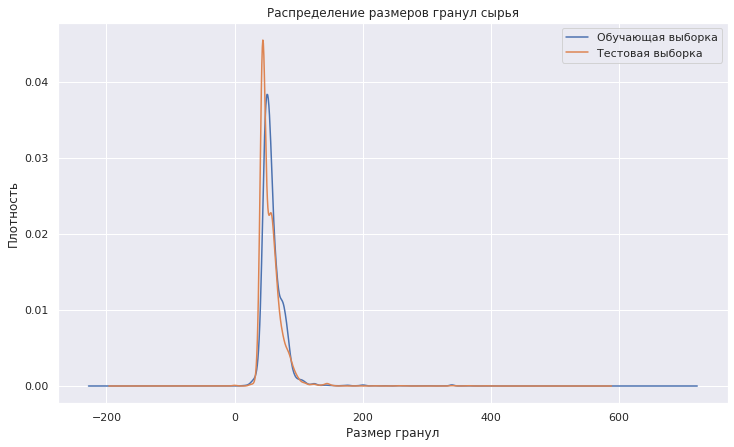

In [25]:
feed_size_rougher.plot.kde(figsize= (12,7))
plt.title('Распределение размеров гранул сырья')
plt.legend(['Обучающая выборка', 'Тестовая выборка'])
plt.xlabel('Размер гранул')
plt.ylabel('Плотность')
plt.show() 

In [26]:
#Так же проверим размер гранул на этапе primary_cleaner.input.feed_size
feed_size_primary = pd.concat([df_train['primary_cleaner.input.feed_size'].dropna(), df_test['primary_cleaner.input.feed_size'].dropna()], axis = 1)
feed_size_primary.columns = ['train', 'test']

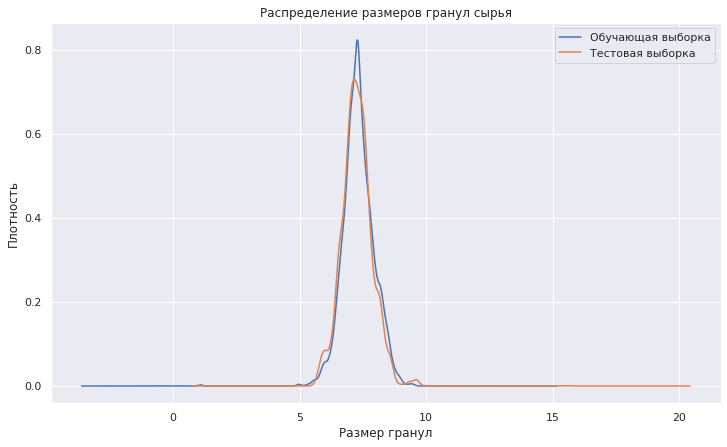

In [27]:
feed_size_primary.plot.kde(figsize= (12,7))
plt.title('Распределение размеров гранул сырья')
plt.legend(['Обучающая выборка', 'Тестовая выборка'])
plt.xlabel('Размер гранул')
plt.ylabel('Плотность')
plt.show() 

В графике постоенном с помощью оценки плотности ядра, мы видим что распределения близки друг к другу. Значит, размеры гранул на обучающей и тестовой выборках отличаются несущественно для построения модели и адекватной оценки

### Исследование суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. 

Стадии на которых нужна концентрация веществ:
- 'rougher.input.feed', 'rougher.output.concentrate', 'final.output.concentrate'

Все вещества:
- 'au', 'pb', 'sol', 'ag'

Сформируем отдельный датасет с суммами этих веществ для каждой стадии

In [28]:
stages_con = ['rougher.input.feed', 'rougher.output.concentrate', 'final.output.concentrate']

material_con = ['au', 'pb', 'sol', 'ag']

In [29]:
def set_list(stage, agent):
    return list(map(lambda item: stage + '_' + item, agent))

def material_sum(df_train):
    materials_sum = pd.DataFrame()

    for stage in stages_con:
        materials_sum[stage] = df_train[set_list(stage, material_con)].sum(axis=1)
    return materials_sum

materials_sum = material_sum(df_train)
materials_sum.head()

,rougher.input.feed,rougher.output.concentrate,final.output.concentrate
date,,,
2016-01-15 00:00:00,51.680034,66.424950,63.644396
2016-01-15 01:00:00,50.659114,67.012710,63.957723
2016-01-15 02:00:00,50.609929,66.103793,64.311180
2016-01-15 03:00:00,51.061546,65.752751,63.573449
2016-01-15 04:00:00,47.859163,65.908382,64.004667


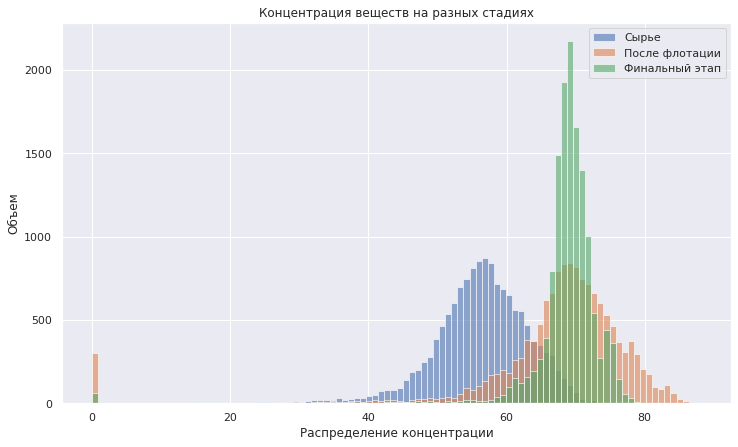

In [30]:
materials_sum.plot.hist(bins=100, alpha=0.6, figsize = (12,7))
plt.title('Концентрация веществ на разных стадиях')
plt.legend(['Сырье', 'После флотации', 'Финальный этап'])
plt.xlabel(f'Распределение концентрации')
plt.ylabel('Объем')
plt.show() 

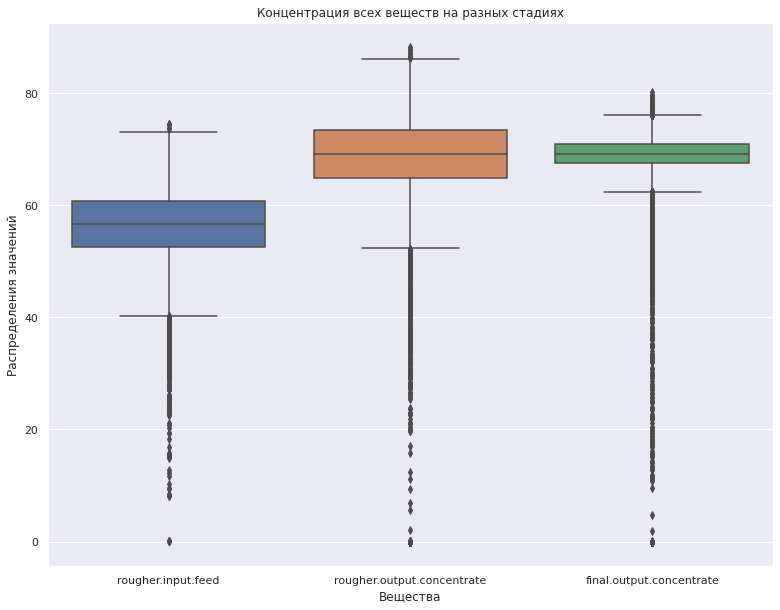

In [31]:
sns.boxplot(data=materials_sum)
plt.title('Концентрация всех веществ на разных стадиях')
plt.xlabel('Вещества')
plt.ylabel('Распределения значений')
plt.show() 

 -  Можно сделать вывод, что суммарная концентрация увеличивается на каждом этапе обработки

Наблюдаются выбросы на каждом этапе, но просто удалить эти данные мы не можем т.к. нет основании полагать, что они ошибочны. Более подозрительно выгледят выборсы с нулевыми значениями ( на гистограмме это очень хорошо заметно) 

Нулевые значения мы просто удалим

In [32]:
display(df_test.shape)
display(df_train.shape)

(5290, 54)

(14149, 86)

In [33]:
#Создадим копию выборки для сравнения сколько строк мы потеряем после удаления
df_train_original = df_train.copy()

#Удалим нулевые значения
df_train = df_train[df_train[features_input_concentrate].sum(1) > 0]
df_train = df_train[df_train[features_rough_concentrate].sum(1) > 0]
df_train = df_train[df_train[features_final_concentrate].sum(1) > 0]

In [34]:
df_full = df_full.loc[df_test.index]
df_test = df_test[df_full[features_input_concentrate].sum(1) > 0]
df_test = df_test[df_full[features_rough_concentrate].sum(1) > 0]
df_test = df_test[df_full[features_final_concentrate].sum(1) > 0]
display(df_test.shape)
display(df_train.shape)

(5154, 54)

(13795, 86)

In [35]:
display(df_train.shape[0])
display(df_train_original.shape[0])
100 * df_train.shape[0] / df_train_original.shape[0]

13795

14149

97.49805639974556

Потеряли всго чуть больше ~2% данных, зато убрали выборосы которые повлияют на обучение модели.

Проверим как сейчас выглядят данные

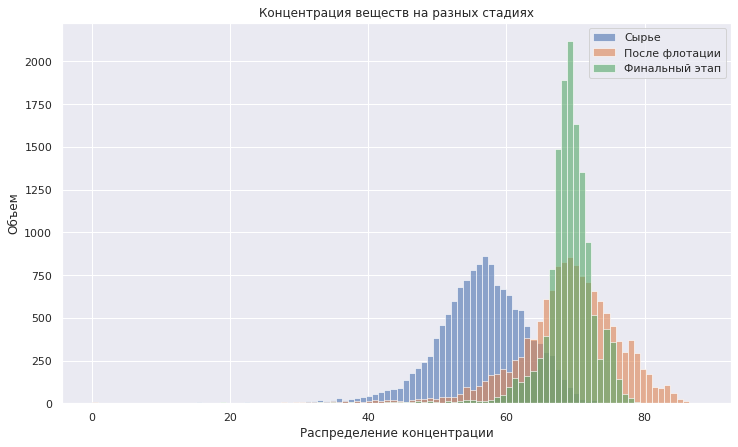

In [36]:
materials_sum = material_sum(df_train)
materials_sum.plot.hist(bins=100, alpha=0.6, figsize = (12,7))
plt.title('Концентрация веществ на разных стадиях')
plt.legend(['Сырье', 'После флотации', 'Финальный этап'])
plt.xlabel(f'Распределение концентрации')
plt.ylabel('Объем')
plt.show() 

Выборосов нет, можно переходить к обучению модели

**Промежуточный вывод**
- Распределения размеров гранул на тестовой и обучающей выборках для этапа флотации и первичной обработки практически одинаковы, поэтому эти данные не помешают обучени модели
- Концентрация золота увеличивается после всех этапов обработки. 
- Концентрация серебра сначала увеличивается после флотации, затем уменьшается послей первой очистки.
- Концентрация свинца растет на каждом этапе обработки.
- Суммарная концентрация увеличивается на каждом этапе обработки
- В результате исследования данных были найдены выбросы на нулевых значениях и удалены из данных

## Построение модель

### Функция для вычисления итоговой sMAPE

In [37]:
def sMAPE(target, prediction):
    return 1 / len(target) * sum( abs(target - prediction) / ( (abs(target) + abs(prediction)) * 0.5) ) * 100

In [38]:
def sMAPE_final(rough, final):
    return 0.25 * rough + 0.75 * final

In [39]:
custom_smpe = make_scorer(sMAPE, greater_is_better=False)

### Подготовка модели

In [40]:
df_train_full = df_train.copy()

df_train = df_train.drop(list(df_train.columns.difference(df_test.columns)), axis=1)

Перед обучением необходимо сформировать необходимые признаки для обучения и тестирования в каждой из выборок

In [41]:
rougher_columns = []
pattern = re.compile('rougher')

for column in list(df_test.columns):
    if re.match(pattern, column):
        rougher_columns.append(column)

final_columns = list(set(df_test.columns) - set(rougher_columns))

In [42]:
test_index = list(df_test.index)

test_target_columns = pd.DataFrame()
test_target_columns = df_full.loc[test_index][['rougher.output.recovery', 'final.output.recovery']]

In [43]:
test_features = df_test.drop(['rougher.output.recovery', 'final.output.recovery'], axis = 1)
test_target = df_test[['rougher.output.recovery', 'final.output.recovery']]

In [44]:
rougher_train_features = df_train[rougher_columns]
rougher_train_target = df_train_full['rougher.output.recovery']

final_train_features = df_train[final_columns]
final_train_target = df_train_full['final.output.recovery']

rougher_test_features = df_test[rougher_columns]
rougher_test_target = test_target_columns['rougher.output.recovery']

final_test_features = df_test[final_columns]
final_test_target = test_target_columns['final.output.recovery']

#print(final_train_features.columns)

In [45]:
rougher_train_features = rougher_train_features.drop(['rougher.output.recovery'],axis = 1)
rougher_test_features = rougher_test_features.drop(['rougher.output.recovery'],axis = 1)
final_train_features = final_train_features.drop(['final.output.recovery'],axis = 1)
final_test_features = final_test_features.drop(['final.output.recovery'],axis = 1)

In [50]:
def fit_scaler(df):
    scaler = StandardScaler()
    scaler.fit(df)
    return scaler

In [51]:
def apply_scaler(df, scaler):
    return pd.DataFrame(scaler.transform(df))

In [52]:
rougher_scaler = fit_scaler(rougher_train_features)
final_scaler = fit_scaler(final_train_features)

In [53]:
rougher_train_features = apply_scaler(rougher_train_features, rougher_scaler)
rougher_test_features = apply_scaler(rougher_test_features, rougher_scaler)

In [54]:
final_train_features = apply_scaler(final_train_features, final_scaler)
final_test_features = apply_scaler(final_test_features, final_scaler)

Инициируем модели

In [55]:
model_rf = RandomForestRegressor(random_state=12345)
model_dt = DecisionTreeRegressor(random_state=12345)

In [56]:
parameters_rf = {"n_estimators":[5,10,30], "max_depth":[1,5,7]}
parameters_dt = {"max_depth":[1,5,7,10]}

обучение на модели RandomForestRegressor с перебором параметров для rougher стадии

In [57]:
cv_rf_r = GridSearchCV(estimator = model_rf, param_grid = parameters_rf,
                       cv = 5,n_jobs=-1, scoring = custom_smpe,
                      verbose=10)
cv_rf_r.fit(rougher_train_features, rougher_train_target)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START max_depth=1, n_estimators=5.................................
[CV 1/5; 1/9] END ...............max_depth=1, n_estimators=5; total time=   0.1s
[CV 2/5; 1/9] START max_depth=1, n_estimators=5.................................
[CV 2/5; 1/9] END ...............max_depth=1, n_estimators=5; total time=   0.1s
[CV 3/5; 1/9] START max_depth=1, n_estimators=5.................................
[CV 3/5; 1/9] END ...............max_depth=1, n_estimators=5; total time=   0.1s
[CV 4/5; 1/9] START max_depth=1, n_estimators=5.................................
[CV 4/5; 1/9] END ...............max_depth=1, n_estimators=5; total time=   0.1s
[CV 5/5; 1/9] START max_depth=1, n_estimators=5.................................
[CV 5/5; 1/9] END ...............max_depth=1, n_estimators=5; total time=   0.1s
[CV 1/5; 2/9] START max_depth=1, n_estimators=10................................
[CV 1/5; 2/9] END ..............max_depth=1, n_es

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=12345),
             n_jobs=-1,
             param_grid={'max_depth': [1, 5, 7], 'n_estimators': [5, 10, 30]},
             scoring=make_scorer(sMAPE, greater_is_better=False), verbose=10)

In [58]:
print('Best score:',-cv_rf_r.best_score_)
print('Best estimator:',cv_rf_r.best_estimator_)

Best score: 6.710117368526073
Best estimator: RandomForestRegressor(max_depth=5, n_estimators=10, random_state=12345)


обучение на модели RandomForestRegressor с перебором параметров для final стадии

In [59]:
cv_rf_f = GridSearchCV(estimator = model_rf, param_grid = parameters_rf,
                       cv = 5,n_jobs=-1, scoring = custom_smpe,
                      verbose=10)
cv_rf_f.fit(final_train_features, final_train_target)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START max_depth=1, n_estimators=5.................................
[CV 1/5; 1/9] END ...............max_depth=1, n_estimators=5; total time=   0.1s
[CV 2/5; 1/9] START max_depth=1, n_estimators=5.................................
[CV 2/5; 1/9] END ...............max_depth=1, n_estimators=5; total time=   0.1s
[CV 3/5; 1/9] START max_depth=1, n_estimators=5.................................
[CV 3/5; 1/9] END ...............max_depth=1, n_estimators=5; total time=   0.1s
[CV 4/5; 1/9] START max_depth=1, n_estimators=5.................................
[CV 4/5; 1/9] END ...............max_depth=1, n_estimators=5; total time=   0.1s
[CV 5/5; 1/9] START max_depth=1, n_estimators=5.................................
[CV 5/5; 1/9] END ...............max_depth=1, n_estimators=5; total time=   0.1s
[CV 1/5; 2/9] START max_depth=1, n_estimators=10................................
[CV 1/5; 2/9] END ..............max_depth=1, n_es

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=12345),
             n_jobs=-1,
             param_grid={'max_depth': [1, 5, 7], 'n_estimators': [5, 10, 30]},
             scoring=make_scorer(sMAPE, greater_is_better=False), verbose=10)

In [93]:
print('Best score:',-cv_rf_f.best_score_)
print('Best estimator:',cv_rf_f.best_estimator_)

Best score: 10.02847540856119
Best estimator: RandomForestRegressor(max_depth=1, n_estimators=30, random_state=12345)


In [94]:
print('RandomForestRegressor')
print('Итоговая sMAPE:  {:.2f} %'.format(sMAPE_final(-cv_rf_r.best_score_, -cv_rf_f.best_score_)))

RandomForestRegressor
Итоговая sMAPE:  9.20 %


обучение на модели DecisionTreeRegressor с перебором параметров для rougher стадии

In [62]:
cv_dt_r = GridSearchCV(estimator = model_dt, param_grid = parameters_dt,
                       cv = 5,n_jobs=-1, scoring = custom_smpe,
                      verbose=10)
cv_dt_r.fit(rougher_train_features, rougher_train_target)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START max_depth=1.................................................
[CV 1/5; 1/4] END ...............................max_depth=1; total time=   0.0s
[CV 2/5; 1/4] START max_depth=1.................................................
[CV 2/5; 1/4] END ...............................max_depth=1; total time=   0.0s
[CV 3/5; 1/4] START max_depth=1.................................................
[CV 3/5; 1/4] END ...............................max_depth=1; total time=   0.0s
[CV 4/5; 1/4] START max_depth=1.................................................
[CV 4/5; 1/4] END ...............................max_depth=1; total time=   0.0s
[CV 5/5; 1/4] START max_depth=1.................................................
[CV 5/5; 1/4] END ...............................max_depth=1; total time=   0.0s
[CV 1/5; 2/4] START max_depth=5.................................................
[CV 1/5; 2/4] END ...............................

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=12345),
             n_jobs=-1, param_grid={'max_depth': [1, 5, 7, 10]},
             scoring=make_scorer(sMAPE, greater_is_better=False), verbose=10)

In [63]:
print('Best score:',-cv_dt_r.best_score_)
print('Best estimator:',cv_dt_r.best_estimator_)

Best score: 7.085292085973497
Best estimator: DecisionTreeRegressor(max_depth=5, random_state=12345)


обучение на модели DecisionTreeRegressor с перебором параметров для final стадии

In [64]:
cv_dt_f = GridSearchCV(estimator = model_dt, param_grid = parameters_dt,
                       cv = 5,n_jobs=-1, scoring = custom_smpe,
                      verbose=10)
cv_dt_f.fit(final_train_features, final_train_target)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START max_depth=1.................................................
[CV 1/5; 1/4] END ...............................max_depth=1; total time=   0.0s
[CV 2/5; 1/4] START max_depth=1.................................................
[CV 2/5; 1/4] END ...............................max_depth=1; total time=   0.0s
[CV 3/5; 1/4] START max_depth=1.................................................
[CV 3/5; 1/4] END ...............................max_depth=1; total time=   0.0s
[CV 4/5; 1/4] START max_depth=1.................................................
[CV 4/5; 1/4] END ...............................max_depth=1; total time=   0.0s
[CV 5/5; 1/4] START max_depth=1.................................................
[CV 5/5; 1/4] END ...............................max_depth=1; total time=   0.1s
[CV 1/5; 2/4] START max_depth=5.................................................
[CV 1/5; 2/4] END ...............................

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=12345),
             n_jobs=-1, param_grid={'max_depth': [1, 5, 7, 10]},
             scoring=make_scorer(sMAPE, greater_is_better=False), verbose=10)

In [65]:
print('Best score:',-cv_dt_f.best_score_)
print('Best estimator:',cv_dt_f.best_estimator_)

Best score: 10.141528856897722
Best estimator: DecisionTreeRegressor(max_depth=1, random_state=12345)


In [91]:
print('DecisionTreeRegressor')
print('Итоговая sMAPE:  {:.2f} %'.format(sMAPE_final(-cv_dt_r.best_score_, -cv_dt_f.best_score_)))

DecisionTreeRegressor
Итоговая sMAPE:  9.38 %


обучение на модели DecisionTreeRegressor с перебором параметров для rougher стадии

Метрика итогового значения sMAPE у модели RandomForestRegressor оказалась ниже, с глубиной max_depth=1 и колличеством деревьев n_estimators=30  . Ее мы будешь использовать на тестировании нашей модели 

**Проверяем на тестовой выборке**

In [67]:
rougher_test_predictions = cv_rf_r.predict(rougher_test_features)

In [85]:
final_test_predictions = cv_rf_f.predict(final_test_features)

In [86]:
print('Итоговая sMAPE на тестовой выборке:  {:.2f} %'.format(sMAPE_final(sMAPE(rougher_test_target, rougher_test_predictions),
            sMAPE(final_test_target, final_test_predictions))))

Итоговая sMAPE на тестовой выборке:  6.87 %


**Проверяем на константной модели**

In [71]:
train_r = df_train.loc[~df_train['rougher.output.recovery'].isna()]
train_f = df_train.loc[~df_train['final.output.recovery'].isna()]

In [72]:
print('Количество объектов обучающей выборки: {}'.format(len(train_r)))
print('Количество объектов обучающей выборки: {}'.format(len(train_f)))

Количество объектов обучающей выборки: 13795
Количество объектов обучающей выборки: 13795


In [76]:
y_true_r = df_full.loc[df_test.index, 'rougher.output.recovery'].dropna()
y_true_f = df_full.loc[df_test.index, 'final.output.recovery'].dropna()

In [77]:
dummy_pred_r = np.array([train_r['rougher.output.recovery'].mean() for _ in range(len(y_true_r))])
dummy_pred_f = np.array([train_f['final.output.recovery'].mean() for _ in range(len(y_true_f))])

In [78]:
print('Константная модель')
print('sMAPE флотации на тестовой выборке: {:.2f} %'.format(sMAPE(y_true_r, dummy_pred_r)))
print('sMAPE очистки на тестовой выборке:  {:.2f} %'.format(sMAPE(y_true_f, dummy_pred_f)))
smape_dummy = sMAPE_final(sMAPE(y_true_r, dummy_pred_r), sMAPE(y_true_f, dummy_pred_f))
print('Итоговая sMAPE на тестовой выборке: {:.2f} %'.format(smape_dummy))

Константная модель
sMAPE флотации на тестовой выборке: 5.38 %
sMAPE очистки на тестовой выборке:  8.56 %
Итоговая sMAPE на тестовой выборке: 7.77 %


- Итоговое sMAPE для RandomForestRegressor - 9.20 %
- Итоговое sMAPE для DecisionTreeRegressor -  9.377

- Итоговое sMAPE для RandomForestRegressor на тестовой выборке - 6.871

 - Лучше всех показал себя DecisionTreeRegressor с sMape 0.03240105950214275

## Общий вывод исследования


- В данных для df_test отсутствовали целевые признаки, для более быстрых исследования лучше вносить их заранее
- Были исследованы распределения концентрации металлов во время различных этапов
- Концентрация золота увеличивается после всех этапов обработки
- В данных присутствовали аномалии, которые во время исследования были обнаружены и удалены. ( 3~% данных) 
- Выделение и добавление целевых признаков
- Было выявлено что, распределения размеров гранул сырья на обучающей и тестовой выборках почти одинаковы
- Суммарная концентрация увеличивается на каждом этапе обработки

- Проведено исследование разных моделей машинного обучения с различными гиперпараметрами
- Была выявлена лучшая модель, которая показала результаты финального sMAPE 0.03240105950214275
  
  **Для данной задачи лучше всего подходит DecisionTreeRegressor**